# BUS 659 – Class 2: Data Manipulation with Pandas and Data Visualization

Welcome to Class 2! This notebook covers essential data manipulation techniques and visualization methods:
- **Part 1**: Data Manipulation with Pandas
- **Lab 1**: Data Manipulation Exercises
- **Part 2**: Data Visualization
- **Lab 2**: Visualization Exercises

> **Instructions**: Run each cell with **Shift+Enter**. Experiment with the code and complete the exercises.

## Setup and Imports

In [2]:
# Import essential libraries
import pandas as pd
import numpy as np
from plotnine import *  # Grammar of graphics plotting
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

print("Libraries loaded successfully!")

# if they don't load successfully, pip install the missing ones! 

Libraries loaded successfully!


---
# Part 1: Data Manipulation with Pandas

## 1.1 Loading and Examining Data

### Loading a CSV File
We'll use the movies dataset for our analysis. The `../` notation means "go up one directory level" to find the file.

In [6]:
# Load the CSV file
# download the movies dataset from Canvas! 

# Note: '../' means back up a directory to find the file
movies = pd.read_csv('../datasets/movies_dataset.csv')
print("Dataset loaded successfully!")



Dataset loaded successfully!


### Examining Data Structure
Let's explore the basic properties of our dataset.

In [7]:
# View first few rows
print("First 5 rows of the dataset:")
print(movies.head())

# Get dataset dimensions
print(f"\nDataset has {movies.shape[0]} rows and {movies.shape[1]} columns")

First 5 rows of the dataset:
             movie_title         original_title  director_name  \
0                Animale                Animale  Emma Benestan   
1   Deadpool & Wolverine   Deadpool & Wolverine     Shawn Levy   
2   Sonic the Hedgehog 3   Sonic the Hedgehog 3    Jeff Fowler   
3         The Wild Robot         The Wild Robot  Chris Sanders   
4  Mufasa: The Lion King  Mufasa: The Lion King  Barry Jenkins   

     actor_1_name          actor_2_name      actor_3_name     budget  \
0   Oulaya Amamra       Damien Rebattel  Vivien Rodriguez    3800000   
1   Ryan Reynolds          Hugh Jackman       Emma Corrin  200000000   
2      Jim Carrey          Ben Schwartz      Keanu Reeves  122000000   
3  Lupita Nyong'o          Pedro Pascal        Kit Connor   78000000   
4    Aaron Pierre  Kelvin Harrison, Jr.     Tiffany Boone  200000000   

        gross  title_year release_date  ...  vote_average  vote_count  \
0       71924        2024   2024-09-20  ...         6.806          1

In [8]:
# Column information - shows data types and missing values
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_title        3000 non-null   object 
 1   original_title     3000 non-null   object 
 2   director_name      2901 non-null   object 
 3   actor_1_name       2902 non-null   object 
 4   actor_2_name       2772 non-null   object 
 5   actor_3_name       2614 non-null   object 
 6   budget             3000 non-null   int64  
 7   gross              3000 non-null   int64  
 8   title_year         3000 non-null   int64  
 9   release_date       3000 non-null   object 
 10  duration           3000 non-null   int64  
 11  vote_average       3000 non-null   float64
 12  vote_count         3000 non-null   int64  
 13  popularity         3000 non-null   float64
 14  genres             2885 non-null   object 
 15  country            2580 non-null   object 
 16  original_language  3000 

In [9]:
# Statistical summary - gives mean, std, min, max for numeric columns
movies.describe()

budget         gross   title_year     duration  vote_average  \
count  3.000000e+03  3.000000e+03  3000.000000  3000.000000   3000.000000   
mean   1.976538e+07  5.709698e+07  2019.607667    84.908333      5.420967   
std    4.435555e+07  1.843502e+08     2.982064    53.589264      3.086066   
min    1.000000e+00  1.000000e+00  2015.000000     0.000000      0.000000   
25%    3.000000e+03  3.000000e+03  2017.000000    28.000000      4.800000   
50%    3.000000e+06  1.689538e+06  2019.000000    98.000000      6.400000   
75%    1.700000e+07  2.436046e+07  2022.000000   118.000000      7.200000   
max    5.839000e+08  2.799439e+09  2024.000000   800.000000     10.000000   

         vote_count   popularity       tmdb_id  
count   3000.000000  3000.000000  3.000000e+03  
mean    1258.549667     3.193665  7.231689e+05  
std     3029.497630     4.805784  3.649140e+05  
min        0.000000     0.000000  1.031700e+04  
25%        1.000000     0.092525  4.127252e+05  
50%       72.500000     1.562650  6.090695e+05  
75%      968.500000     3.767350  1.023661e+06  
max    30901.000000    48.659400  1.528350e+06

## 1.2 Selecting Data

### Selecting Rows by Position

In [10]:
# Select first 20 rows using iloc (integer location)
movies.iloc[0:20]

movie_title                   original_title  \
0                           Animale                          Animale   
1              Deadpool & Wolverine             Deadpool & Wolverine   
2              Sonic the Hedgehog 3             Sonic the Hedgehog 3   
3                    The Wild Robot                   The Wild Robot   
4             Mufasa: The Lion King            Mufasa: The Lion King   
5                      Inside Out 2                     Inside Out 2   
6                     The Substance                    The Substance   
7                             Anora                            Anora   
8                    Dune: Part Two                   Dune: Part Two   
9                 Kraven the Hunter                Kraven the Hunter   
10            Bad Boys: Ride or Die            Bad Boys: Ride or Die   
11                     Gladiator II                     Gladiator II   
12                             Flow                          Straume   
13                         Babygirl                         Babygirl   
14  Godzilla x Kong: The New Empire  Godzilla x Kong: The New Empire   
15                    The Beekeeper                    The Beekeeper   
16                        Nosferatu                        Nosferatu   
17          Furiosa: A Mad Max Saga          Furiosa: A Mad Max Saga   
18                           Wicked                           Wicked   
19                               IF                               IF   

       director_name          actor_1_name          actor_2_name  \
0      Emma Benestan         Oulaya Amamra       Damien Rebattel   
1         Shawn Levy         Ryan Reynolds          Hugh Jackman   
2        Jeff Fowler            Jim Carrey          Ben Schwartz   
3      Chris Sanders        Lupita Nyong'o          Pedro Pascal   
4      Barry Jenkins          Aaron Pierre  Kelvin Harrison, Jr.   
5        Kelsey Mann           Amy Poehler            Maya Hawke   
6    Coralie Fargeat            Demi Moore      Margaret Qualley   
7         Sean Baker         Mikey Madison      Mark Eydelshteyn   
8   Denis Villeneuve     Timothée Chalamet               Zendaya   
9       J.C. Chandor  Aaron Taylor-Johnson         Ariana DeBose   
10      Adil El Arbi            Will Smith       Martin Lawrence   
11      Ridley Scott           Paul Mescal     Denzel Washington   
12  Gints Zilbalodis                   NaN                   NaN   
13      Halina Reijn         Nicole Kidman      Harris Dickinson   
14      Adam Wingard          Rebecca Hall     Brian Tyree Henry   
15        David Ayer         Jason Statham    Emmy Raver-Lampman   
16     Robert Eggers        Lily-Rose Depp        Nicholas Hoult   
17     George Miller       Anya Taylor-Joy       Chris Hemsworth   
18        Jon M. Chu         Cynthia Erivo         Ariana Grande   
19    John Krasinski        Cailey Fleming         Ryan Reynolds   

          actor_3_name     budget       gross  title_year release_date  ...  \
0     Vivien Rodriguez    3800000       71924        2024   2024-09-20  ...   
1          Emma Corrin  200000000  1338073645        2024   2024-07-24  ...   
2         Keanu Reeves  122000000   492162604        2024   2024-12-19  ...   
3           Kit Connor   78000000   331982078        2024   2024-09-12  ...   
4        Tiffany Boone  200000000   722631756        2024   2024-12-18  ...   
5   Kensington Tallman  200000000  1698863816        2024   2024-06-11  ...   
6         Dennis Quaid   17500000    76506196        2024   2024-09-07  ...   
7         Yura Borisov    6000000    56286295        2024   2024-10-14  ...   
8     Rebecca Ferguson  190000000   714444358        2024   2024-02-27  ...   
9       Fred Hechinger  130000000    62076533        2024   2024-12-11  ...   
10     Vanessa Hudgens  100000000   404547819        2024   2024-06-05  ...   
11        Pedro Pascal  310000000   462180717        2024   2024-11-13  ...   
12                 NaN    3700000    17660107        20

In [11]:
# Select rows 200 to 210
movies.iloc[200:210]

movie_title                   original_title  \
200  PAPmusic: Animation for Fashion  PAPmusic: Animation for Fashion   
201                 In Eros We Trust                 In Eros We Trust   
202             Beyond the Moonlight             Beyond the Moonlight   
203                       Beach Love                       Beach Love   
204                  Blues for Alice                  Blues for Alice   
205                              COW                              COW   
206     Perspectives on a Park Bench     Perspectives on a Park Bench   
207                      El Redentor                      El Redentor   
208                   DIES MIRABILIS                   DIES MIRABILIS   
209                           Brebis                           Brebis   

        director_name      actor_1_name        actor_2_name    actor_3_name  \
200            LeiKiè            LeiKiè       Marco Mazzoli      Rudy Zerbi   
201     Bernardo Goya    Joiakin Foster   Dennis Candelaria   Freddy Burgos   
202    Bruno Ferreira     Mariana Motta         Diego Monti   Natane Castro   
203     Bader Bloushi     Bader Bloushi          Bader Taqi         Letizia   
204    Alice Purinson    Alice Purinson   Calista Zaporojan      Gabe Garza   
205         Joe Appel     Andrew Sykora       Craig Pearman  Jack Zatkowsky   
206     Henry Kaufman      Teri Ralston       Henry Kaufman   Daniela Arias   
207   Andrew Bañuelos       César Gómez  Jonathan Cervantes       Diego Puy   
208  Louis  Vernocchi  Louis  Vernocchi     Yasmine Mellouk             NaN   
209   Louzyka Mainguy     Oceane Simard      Éloïse Corbeil    Jeanne Morin   

      budget  gross  title_year release_date  ...  vote_average  vote_count  \
200  4869884   6700        2024   2024-09-26  ...           1.2           3   
201     2520    608        2024   2024-03-31  ...           0.0           0   
202     7500  12200        2024   2024-02-01  ...           0.0           0   
203      180    300        2024   2024-12-02  ...           0.0           0   
204      200    400        2024   2024-08-30  ...           0.0           0   
205      625   1000        2024   2024-07-27  ...           0.0           0   
206      100   1000        2024   2024-05-04  ...           2.0           1   
207      505    211        2024   2024-06-14  ...          10.0           1   
208      100    150        2024   2024-10-09  ...          10.0           2   
209     4500   2000        2024   2024-10-24  ...           9.0           1   

     popularity                          genres  \
200      0.1880  Animation|Comedy|Romance|Music   
201      0.1867                  Romance|Action   
202      0.1866                           Drama   
203      0.1832                  Comedy|Romance   
204      0.1795                             NaN   
205      0.1782          Comedy|Science Fiction   
206      0.1756                     Drama|Music   
207      0.1702              Drama|Action|Crime   
208      0.1634                          Comedy   
209      0.1573                           Drama   

                             country original_language  \
200             Italy|United Kingdom                it   
201                              NaN                en   
202                           Brazil                en   
203                           Kuwait                en   
204                              NaN                en   
205                              NaN                en   
206                              NaN                en   
207  Mexico|United States of America                es   
208                              NaN                fr   
209                           Canada                fr   

                                              overview  \
200  A look at the dynamics of a fashion company, w...   
201  A militarized version of Hitch (2005). A moder...   
202  Protagonist faces emotional dichotomy, after a...   
203  Jimmy and Jason wanted a relaxing day at th

In [12]:
# Select last 5 rows
movies.tail(5)

movie_title               original_title  \
2995  THE 10TH KKBOX MUSIC AWARDS  THE 10TH KKBOX MUSIC AWARDS   
2996                   Cidademove                   Cidademove   
2997            O vazio na janela            O vazio na janela   
2998                     M 22.079                     M 22.079   
2999                    The Drift                    La Sequía   

              director_name  actor_1_name    actor_2_name actor_3_name  \
2995                    NaN           NaN             NaN          NaN   
2996  Cleber Fernando Gomes           NaN             NaN          NaN   
2997  Cleber Fernando Gomes           NaN             NaN          NaN   
2998                    NaN           NaN             NaN          NaN   
2999           Jose Morales  Melissa Ríos  Giezi Portilla          NaN   

      budget  gross  title_year release_date  ...  vote_average  vote_count  \
2995   20000   2000        2015   2015-02-08  ...           0.0           0   
2996     100    100        2015   2015-04-28  ...           0.0           0   
2997     100    100        2015   2015-03-18  ...           0.0           0   
2998      50    400        2015   2015-02-01  ...           0.0           1   
2999    1500   3000        2015   2015-01-06  ...           0.0           0   

      popularity  genres country original_language  \
2995         0.0   Music     NaN                zh   
2996         0.0   Drama  Brazil                pt   
2997         0.0   Drama  Brazil                pt   
2998         0.0     NaN     NaN                en   
2999         0.0   Drama     NaN                es   

                                               overview tagline  tmdb_id  \
2995                                                NaN     NaN  1117251   
2996                                                NaN     NaN   930667   
2997                                                NaN     NaN   930668   
2998                     A brief look at a nearby star.     NaN   315213   
2999  "La Sequía" describes the relationship of an i...     NaN  1102535   

      imdb_id  
2995      NaN  
2996      NaN  
2997      NaN  
2998      NaN  
2999      NaN  

[5 rows x 21 columns]

### Selecting Columns

In [13]:
# View all column names
print("Column names:")
print(movies.columns.tolist())

Column names:
['movie_title', 'original_title', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'budget', 'gross', 'title_year', 'release_date', 'duration', 'vote_average', 'vote_count', 'popularity', 'genres', 'country', 'original_language', 'overview', 'tagline', 'tmdb_id', 'imdb_id']


In [14]:
# Select single column - returns a Series
director_series = movies['director_name']
print("First 10 directors:")
print(director_series.head(10))

First 10 directors:
0       Emma Benestan
1          Shawn Levy
2         Jeff Fowler
3       Chris Sanders
4       Barry Jenkins
5         Kelsey Mann
6     Coralie Fargeat
7          Sean Baker
8    Denis Villeneuve
9        J.C. Chandor
Name: director_name, dtype: object


In [15]:
# Select multiple columns - use double brackets to return a DataFrame
subset = movies[['movie_title', 'director_name', 'gross']]
print("Subset with 3 columns:")
print(subset.head())

Subset with 3 columns:
             movie_title  director_name       gross
0                Animale  Emma Benestan       71924
1   Deadpool & Wolverine     Shawn Levy  1338073645
2   Sonic the Hedgehog 3    Jeff Fowler   492162604
3         The Wild Robot  Chris Sanders   331982078
4  Mufasa: The Lion King  Barry Jenkins   722631756


In [16]:
# Select columns by pattern - useful for finding related columns
actor_columns = movies.filter(like='actor')
print("Columns containing 'actor':")
print(actor_columns.head())

Columns containing 'actor':
     actor_1_name          actor_2_name      actor_3_name
0   Oulaya Amamra       Damien Rebattel  Vivien Rodriguez
1   Ryan Reynolds          Hugh Jackman       Emma Corrin
2      Jim Carrey          Ben Schwartz      Keanu Reeves
3  Lupita Nyong'o          Pedro Pascal        Kit Connor
4    Aaron Pierre  Kelvin Harrison, Jr.     Tiffany Boone


## 1.3 Filtering Rows

### Basic Row Filtering
Filter rows based on conditions using boolean indexing.

In [17]:
# Movies with budget > 100 million
high_budget = movies[movies['budget'] > 100000000]
print(f"Number of high budget movies: {len(high_budget)}")
print(high_budget[['movie_title', 'budget']].head())

Number of high budget movies: 162
             movie_title     budget
1   Deadpool & Wolverine  200000000
2   Sonic the Hedgehog 3  122000000
4  Mufasa: The Lion King  200000000
5           Inside Out 2  200000000
8         Dune: Part Two  190000000


In [18]:
# Movies from 2015
movies_2015 = movies[movies['title_year'] == 2015]
print(f"Number of movies from 2015: {len(movies_2015)}")

# what's another way to do this? 

Number of movies from 2015: 282


In [19]:
# Combining conditions with & (and) and | (or)
# Note: Use parentheses around each condition
recent_blockbusters = movies[(movies['budget'] > 100000000) & 
                             (movies['title_year'] >= 2010)]
print(f"Recent blockbusters: {len(recent_blockbusters)} movies")

Recent blockbusters: 162 movies


### String Filtering

In [20]:
# Movies by specific director
# Note: == checks for exact match
spielberg_movies = movies[movies['director_name'] == 'Steven Spielberg']
print(f"Steven Spielberg directed {len(spielberg_movies)} movies in this dataset")
spielberg_movies[['movie_title', 'title_year']].head()

Steven Spielberg directed 6 movies in this dataset


movie_title  title_year
772      The Fabelmans        2022
1064   West Side Story        2021
1759  Ready Player One        2018
2131          The Post        2017
2436           The BFG        2016

In [21]:
# Movies containing 'Star' in title
# str.contains() searches for substring, na=False handles missing values
star_movies = movies[movies['movie_title'].str.contains('Star', na=False)]
print(f"Movies with 'Star' in title: {len(star_movies)}")
star_movies[['movie_title']].head()

# try this with another string! 

Movies with 'Star' in title: 14


movie_title
184                      The Blue Star
296     The Amazing Life of Molly Star
967              All The Stars We Made
1235                      Aperte Start
1504  Star Wars: The Rise of Skywalker

In [22]:
# Movies in English
english_movies = movies[movies['original_language'] == 'en']
print(f"English movies: {len(english_movies)} out of {len(movies)} total")

English movies: 1738 out of 3000 total


## 1.4 Sorting Data

In [23]:
# Sort by budget (descending)
# Option 1: Sort then select columns (using double brackets)
sorted_by_budget = (movies.sort_values('budget', ascending=False)
                    [['budget', 'movie_title', 'title_year', 'director_name', 'vote_average']])
print("Top 5 movies by budget:")
sorted_by_budget.head()

Top 5 movies by budget:


budget                       movie_title  title_year  \
736   583900000           Jurassic World Dominion        2022   
1504  416000000  Star Wars: The Rise of Skywalker        2019   
2722  365000000           Avengers: Age of Ultron        2015   
1496  356000000                 Avengers: Endgame        2019   
733   350000000          Avatar: The Way of Water        2022   

        director_name  vote_average  
736   Colin Trevorrow         6.600  
1504      J.J. Abrams         6.300  
2722      Joss Whedon         7.300  
1496    Anthony Russo         8.238  
733     James Cameron         7.613

In [24]:
# Option 2: Select columns first, then sort
# The \ allows line continuation for readability
sorted_alt = movies.sort_values('budget', ascending=False) \
    [['budget', 'movie_title', 'title_year', 'director_name', 'vote_average']]
sorted_alt.head()

budget                       movie_title  title_year  \
736   583900000           Jurassic World Dominion        2022   
1504  416000000  Star Wars: The Rise of Skywalker        2019   
2722  365000000           Avengers: Age of Ultron        2015   
1496  356000000                 Avengers: Endgame        2019   
733   350000000          Avatar: The Way of Water        2022   

        director_name  vote_average  
736   Colin Trevorrow         6.600  
1504      J.J. Abrams         6.300  
2722      Joss Whedon         7.300  
1496    Anthony Russo         8.238  
733     James Cameron         7.613

In [25]:
# Sort by multiple columns
# First by year (newest first), then by gross (highest first)
multi_sorted = (movies.sort_values(['title_year', 'gross'], 
                                   ascending=[False, False])
                [['gross', 'movie_title', 'title_year', 'director_name']])
print("Movies sorted by year then gross:")
multi_sorted.head(10)

Movies sorted by year then gross:


gross                      movie_title  title_year     director_name
5    1698863816                     Inside Out 2        2024       Kelsey Mann
1    1338073645             Deadpool & Wolverine        2024        Shawn Levy
18    756085570                           Wicked        2024        Jon M. Chu
4     722631756            Mufasa: The Lion King        2024     Barry Jenkins
8     714444358                   Dune: Part Two        2024  Denis Villeneuve
14    571750016  Godzilla x Kong: The New Empire        2024      Adam Wingard
2     492162604             Sonic the Hedgehog 3        2024       Jeff Fowler
107   480600000                             Yolo        2024          Jia Ling
11    462180717                     Gladiator II        2024      Ridley Scott
10    404547819            Bad Boys: Ride or Die        2024      Adil El Arbi

In [26]:
# Get top 10 highest grossing films using nlargest
# More efficient than sorting entire dataset
top_grossing = movies.nlargest(10, 'gross')[['gross', 'movie_title', 'title_year', 'director_name']]
print("Top 10 highest grossing films:")
top_grossing

Top 10 highest grossing films:


gross                   movie_title  title_year    director_name
1496  2799439100             Avengers: Endgame        2019    Anthony Russo
733   2320250281      Avatar: The Way of Water        2022    James Cameron
2732  2068223624  Star Wars: The Force Awakens        2015      J.J. Abrams
1754  2052415039        Avengers: Infinity War        2018    Anthony Russo
1029  1921847111       Spider-Man: No Way Home        2021        Jon Watts
5     1698863816                  Inside Out 2        2024      Kelsey Mann
2720  1671537444                Jurassic World        2015  Colin Trevorrow
2725  1515400000                     Furious 7        2015        James Wan
735   1488732821             Top Gun: Maverick        2022  Joseph Kosinski
1499  1453683476                     Frozen II        2019     Jennifer Lee

In [27]:
# Top grossing movie by year using groupby
# This is more complex - we group by year, then find the top movie in each group
top_by_year = (movies.groupby('title_year')
               .apply(lambda x: x.nlargest(1, 'gross'))
               .reset_index(drop=True)
               [['title_year', 'gross', 'movie_title', 'director_name']])
print("Top grossing movie each year (last 10 years):")
top_by_year.tail(10)

Top grossing movie each year (last 10 years):


title_year       gross                                        movie_title  \
0        2015  2068223624                       Star Wars: The Force Awakens   
1        2016  1155046416                         Captain America: Civil War   
2        2017  1332698830                           Star Wars: The Last Jedi   
3        2018  2052415039                             Avengers: Infinity War   
4        2019  2799439100                                  Avengers: Endgame   
5        2020   523542183  Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...   
6        2021  1921847111                            Spider-Man: No Way Home   
7        2022  2320250281                           Avatar: The Way of Water   
8        2023  1445638421                                             Barbie   
9        2024  1698863816                                       Inside Out 2   

    director_name  
0     J.J. Abrams  
1       Joe Russo  
2    Rian Johnson  
3   Anthony Russo  
4   Anthony Russo  
5  Haruo Sotozaki  
6       Jon Watts  
7   James Cameron  
8    Greta Gerwig  
9     Kelsey Mann

## 1.5 Creating New Variables

### Basic Calculations

In [28]:
# Profit calculation
# Vectorized operations apply to entire column at once
movies['profit'] = movies['gross'] - movies['budget']

# Profit margin as percentage
movies['profit_margin'] = (movies['gross'] - movies['budget']) / movies['budget'] * 100

# Log transformations for skewed data
movies['log_budget'] = np.log10(movies['budget'])
movies['log_gross'] = np.log10(movies['gross'])

print("New variables created:")
print(movies[['movie_title', 'profit', 'profit_margin']].head())

New variables created:
             movie_title      profit  profit_margin
0                Animale    -3728076     -98.107263
1   Deadpool & Wolverine  1138073645     569.036822
2   Sonic the Hedgehog 3   370162604     303.411970
3         The Wild Robot   253982078     325.618049
4  Mufasa: The Lion King   522631756     261.315878


### Creating Categorical Variables

In [29]:
# Categorize by budget using pd.cut()
# bins define the boundaries, labels name each category
movies['budget_category'] = pd.cut(movies['budget'], 
                                   bins=[0, 1e6, 50e6, 100e6, np.inf],
                                   labels=['Low', 'Medium', 'High', 'Blockbuster'])

# Binary success indicator
movies['is_profitable'] = movies['profit'] > 0

# Decade variable using floor division
# // rounds down: 2017 // 10 = 201, then * 10 = 2010
movies['decade'] = (movies['title_year'] // 10) * 10

print("Budget categories:")
print(movies['budget_category'].value_counts())

Budget categories:
budget_category
Medium         1425
Low            1271
Blockbuster     162
High            142
Name: count, dtype: int64


## 1.6 Renaming Variables

In [30]:
# Rename single column
movies.rename(columns={'tagline': 'tag'}, inplace=True)

# Rename multiple columns using dictionary
movies.rename(columns={
    'tagline': 'tag',
    'actor_1_name': 'lead_actor'
}, inplace=True)

print("Updated column names:")
print(movies.columns.tolist()[:10])  # Show first 10 columns

Updated column names:
['movie_title', 'original_title', 'director_name', 'lead_actor', 'actor_2_name', 'actor_3_name', 'budget', 'gross', 'title_year', 'release_date']


## 1.7 Method Chaining

Method chaining allows you to string together multiple operations in a clean, readable way.

In [33]:
# Chain operations together
# Parentheses allow multi-line chaining
result = (movies
          .query('budget > 50000000')  # Filter rows
          .assign(profit=lambda x: x['gross'] - x['budget'])  # Create new column
          .sort_values('profit', ascending=False)  # Sort
          .head(20)  # Take top 20
          [['movie_title', 'director_name', 'profit', 'budget']])  # Select columns

print("Top 20 most profitable big-budget movies:")
result.head()

Top 20 most profitable big-budget movies:


movie_title  director_name      profit     budget
1496             Avengers: Endgame  Anthony Russo  2443439100  356000000
733       Avatar: The Way of Water  James Cameron  1970250281  350000000
2732  Star Wars: The Force Awakens    J.J. Abrams  1823223624  245000000
1754        Avengers: Infinity War  Anthony Russo  1752415039  300000000
1029       Spider-Man: No Way Home      Jon Watts  1721847111  200000000

---
# Lab 1: Data Manipulation Exercises

Now it's your turn! Complete these exercises to practice data manipulation skills.
The exercises increase in difficulty from basic to intermediate.

### Exercise 1: Basic Selection (Easy)
Select and display:
- All movies from the year 2010
- Show only the movie_title, director_name, and budget columns
- Display the first 5 rows

In [48]:
# TODO: Your code here
# Hint: Filter for title_year == 2010, then select columns

movies[movies['release_date'].str[:4] == '2020'][['movie_title', 'director_name', 'budget']].head(5)
# movies['release_date'].str[:4].unique()
# movies.head()

movie_title      director_name  \
1298  Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...     Haruo Sotozaki   
1299                                  Wonder Woman 1984      Patty Jenkins   
1300                                  Trolls World Tour         Walt Dohrn   
1301                                  Bad Boys for Life      Bilall Fallah   
1302                                              Tenet  Christopher Nolan   

         budget  
1298   15700000  
1299  200000000  
1300   90000000  
1301   90000000  
1302  205000000

### Exercise 2: Simple Filtering (Easy)
Find all movies that:
- Have a vote_average greater than 8.0
- How many movies meet this criteria?

In [52]:
# TODO: Your code here
# Hint: Use boolean indexing with movies['vote_average'] > 8.0

len(movies[movies['vote_average'] > 8.0])

338

### Exercise 3: Sorting Practice (Easy-Medium)
Find the 5 longest movies in the dataset:
- Sort by duration (descending)
- Show movie_title, duration, and title_year

In [53]:
# TODO: Your code here
# Hint: Use sort_values() or nlargest()

movies[['movie_title', 'duration',  'title_year']].sort_values('duration',ascending=False)

movie_title  duration  title_year
571                                    1286       800        2023
1726              2019: A Cinematic Odyssey       480        2019
669   One Copyright Strike to Rule Them All       409        2023
2683                                 FNAFHS       404        2016
2066                                 Hævn 3       300        2018
...                                     ...       ...         ...
226                 Le tueur du premier mai         0        2024
2703                         Vampiro da Rua         0        2016
980                        Comi uma chinesa         0        2022
2702                                    QRT         0        2016
2360                                 hævn 2         0        2017

[3000 rows x 3 columns]

### Exercise 4: Creating Variables (Medium)
Create a new column called 'roi' (Return on Investment):
- Formula: roi = (gross - budget) / budget
- Find the movie with the highest ROI
- Display its title, budget, gross, and ROI

In [55]:
# TODO: Your code here
# Hint: Create the roi column, then use nlargest(1, 'roi')

movies['roi'] = (movies['gross'] - movies['budget'])/movies['budget']

movies.nlargest(1,'roi')[['movie_title', 'budget', 'gross', 'roi']]

movie_title  budget     gross        roi
215  Ginger Person       1  10000000  9999999.0

### Exercise 5: Multiple Conditions (Medium)
Find movies that are both successful and well-rated:
- Budget less than 50 million
- Gross more than 100 million
- Rating (vote_average) above 7.0
- How many movies meet all these criteria?

In [57]:
# TODO: Your code here
# Hint: Combine conditions with & operator, use parentheses

len(movies[(movies['budget'] < 50000000) & (movies['gross'] > 100000000) & (movies['vote_average']>7)])

53

### Exercise 6: String Operations (Medium)
Find all movies with "Love" in the title:
- Use str.contains() with case=False for case-insensitive search
- Show the movie titles and release years
- Sort by year (newest first)

In [61]:
# TODO: Your code here

movies['release_year'] = movies['release_date'].str[:4].astype(int)
movies[movies['movie_title'].str.contains('Love', case=False, na=False)][['movie_title','release_year']]

movie_title  release_year
97              Bob Marley: One Love          2024
203                       Beach Love          2024
328                         Loveworn          2024
424                       Love Again          2023
525                  Along Came Love          2023
595                     Peanut Lover          2023
630             For the Love of Cash          2023
664                           Loveju          2023
756                   Redeeming Love          2022
870               My Sailor, My Love          2022
893               The Valley of Love          2022
954   Hitler vs Günther - Love Story          2022
1145  OSS 117: From Africa with Love          2021
1315               Love and Monsters          2020
1382                   Love Mocktail          2020
1384       Love Likes Coincidences 2          2020
1738                      Young Love          2019
1980                My Beloved Enemy          2018
2029    For The Love of a Chanel Bag          2018
2097         Vengeance: A Love Story          2017
2158                      About Love          2017
2211            Toilet: A Love Story          2017
2307                52Hz, I Love You          2017
2426             10 Cloverfield Lane          2016
2590               Love & Friendship          2016
2624                        For Love          2016
2660                      After Love          2016
2779                    Love & Mercy          2015
2860     A Tale of Love and Darkness          2015
2887                Love the Coopers          2015
2932                 Accidental Love          2015

### Exercise 7: Groupby Basics (Medium-Hard)
For each year from 2020-2024:
- Calculate the average budget
- Count the number of movies
- Show results sorted by year

In [75]:
# TODO: Your code here
# Hint: Filter for years first, then use groupby('title_year').agg()
# movies.groupby('release_year').agg('mean')
movies.groupby('release_year').agg({'budget': 'mean', 'movie_title': 'count'}).sort_index(ascending=False)

budget  movie_title
release_year                           
2024          1.645875e+07          340
2023          1.861410e+07          392
2022          1.744801e+07          297
2021          1.930067e+07          269
2020          1.304576e+07          194
2019          2.086574e+07          262
2018          2.141008e+07          317
2017          2.158573e+07          318
2016          2.385683e+07          329
2015          2.316190e+07          282

### Exercise 8: Top Directors Analysis (Hard)
Find the top 5 directors by total gross revenue:
- Sum the gross revenue for all their movies
- Also show how many movies each director made
- Display director name, total gross, and movie count

In [76]:
# TODO: Your code here
# Hint: groupby('director_name').agg({'gross': 'sum', 'movie_title': 'count'})

movies.groupby('director_name').agg({'gross': 'sum', 'movie_title': 'count'})

gross  movie_title
director_name                       
A Abdulkani         100            1
A. P. Arjun     3247000            1
ANGEL               849            1
Aabir Ghosh         100            1
Aanand L. Rai  39270000            1
...                 ...          ...
ירין טובול           20            1
نعمان حسين     30000000            1
刘天荣             2000000            1
劉昆曉                   1            1
蒋润庭                 200            1

[2344 rows x 2 columns]

---
# Part 2: Data Visualization

## 2.1 Grammar of Graphics with plotnine

The Grammar of Graphics provides a structured way to build plots:
1. **Data**: What data to visualize
2. **Aesthetics**: Map data to visual properties (x, y, color, size)
3. **Geometry**: How to represent data (points, lines, bars)
4. **Facets**: Split into subplots
5. **Statistics**: Statistical transformations
6. **Coordinates**: Coordinate system (linear, log)
7. **Themes**: Visual styling

### Basic Scatter Plot

In [110]:
from plotnine import ggplot, aes, geom_point, geom_line, geom_bar, facet_wrap, labs, theme_bw, geom_col
import pandas as pd

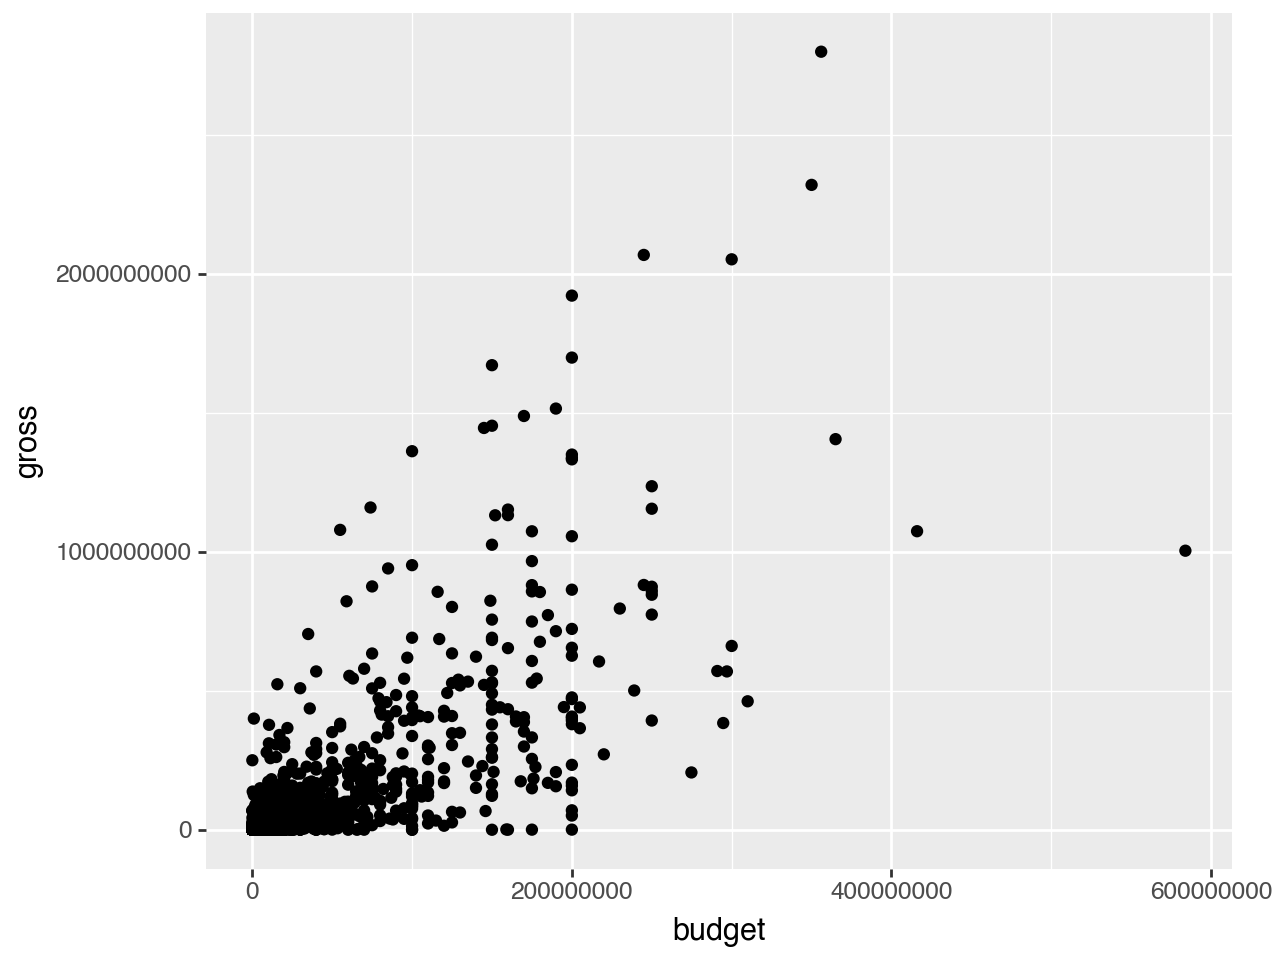

In [93]:
# Basic scatter plot
# ggplot() creates the base plot, aes() maps data to axes, geom_point() adds points


plt = (ggplot(movies, aes(x='budget', y='gross')) + 
 geom_point())
plt.show()

### Adding Aesthetics (Color and Size)

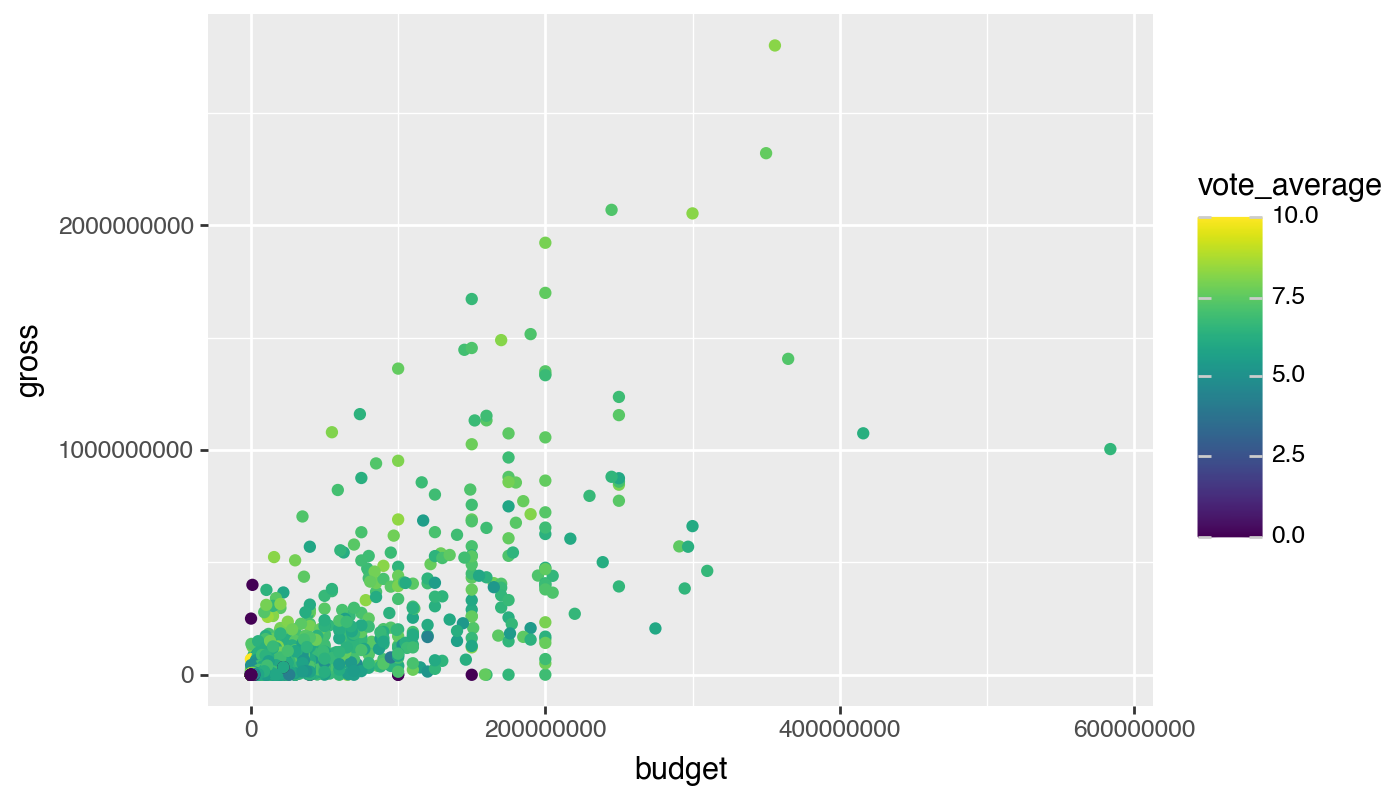

In [94]:
# Color points by rating, adjust figure size
(ggplot(movies, aes(x='budget', y='gross', color='vote_average')) + 
 geom_point() +
 theme(figure_size=(7, 4)))

### Using Log Scales

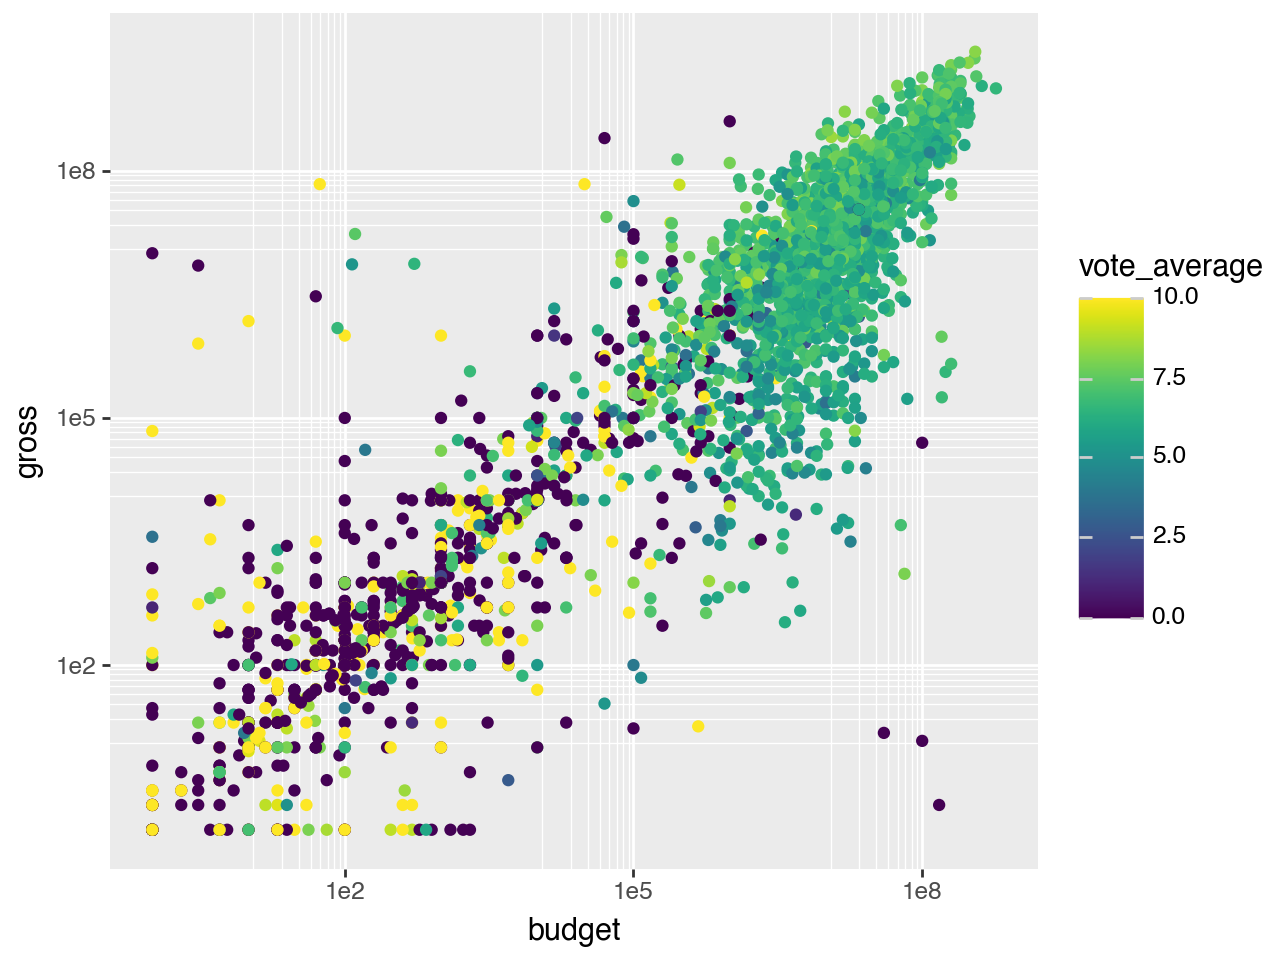

In [95]:
# Log scales help visualize data that spans multiple orders of magnitude
(ggplot(movies, aes(x='budget', y='gross', color='vote_average')) + 
 geom_point() +
 scale_x_log10() +  # Log scale for x-axis
 scale_y_log10())   # Log scale for y-axis

### Adding Log Scale

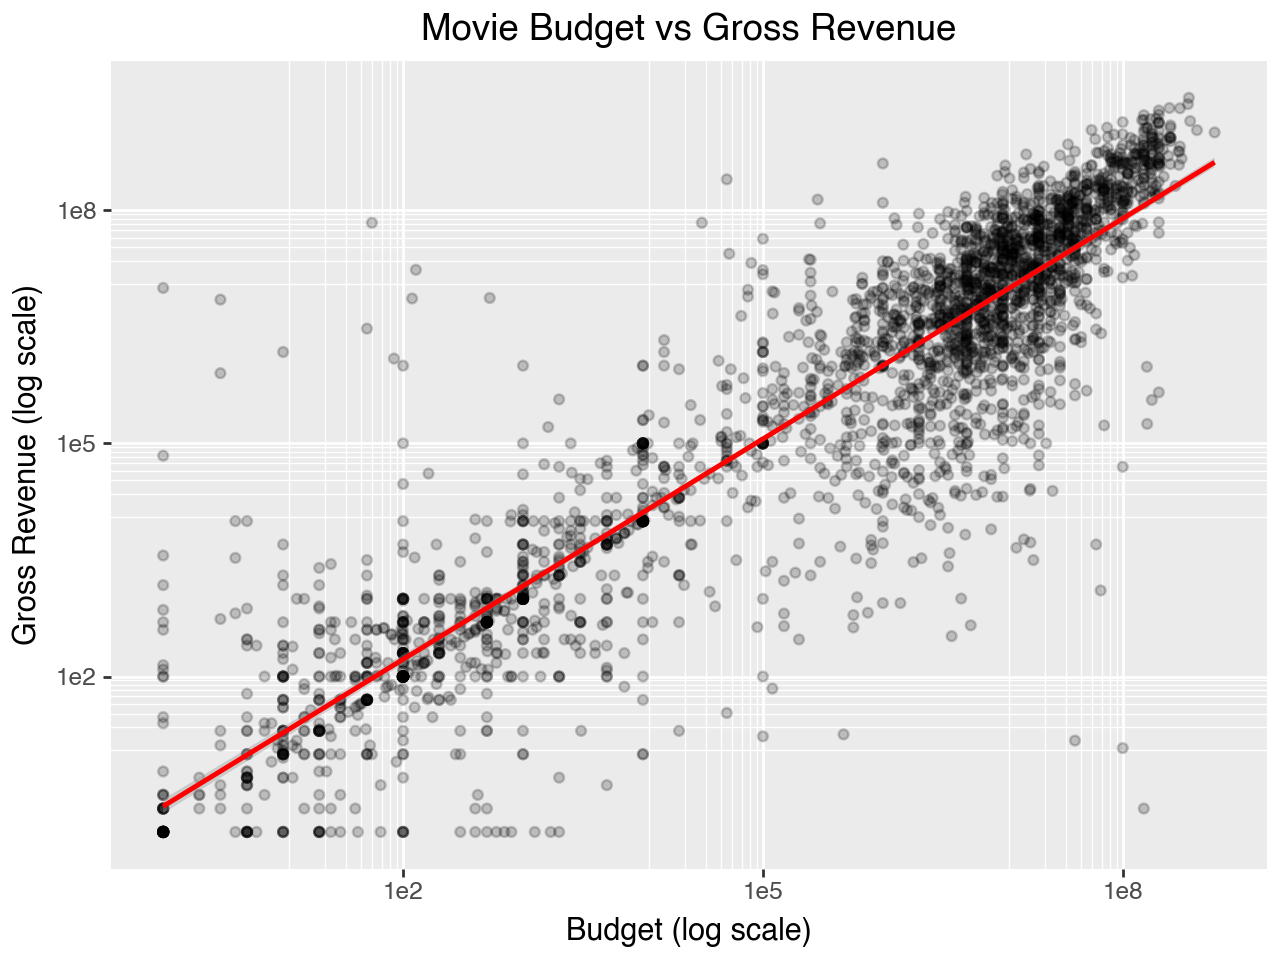

In [96]:
# Points with smoothing line
# alpha controls transparency, method='lm' fits linear model
(ggplot(movies, aes(x='budget', y='gross')) + 
 geom_point(alpha=0.2) +  # Semi-transparent points
 geom_smooth(method='lm', color='red') +  # Linear regression line
 scale_x_log10() +
 scale_y_log10() +
 labs(title='Movie Budget vs Gross Revenue',
      x='Budget (log scale)',
      y='Gross Revenue (log scale)'))

### Histogram with Density Curve

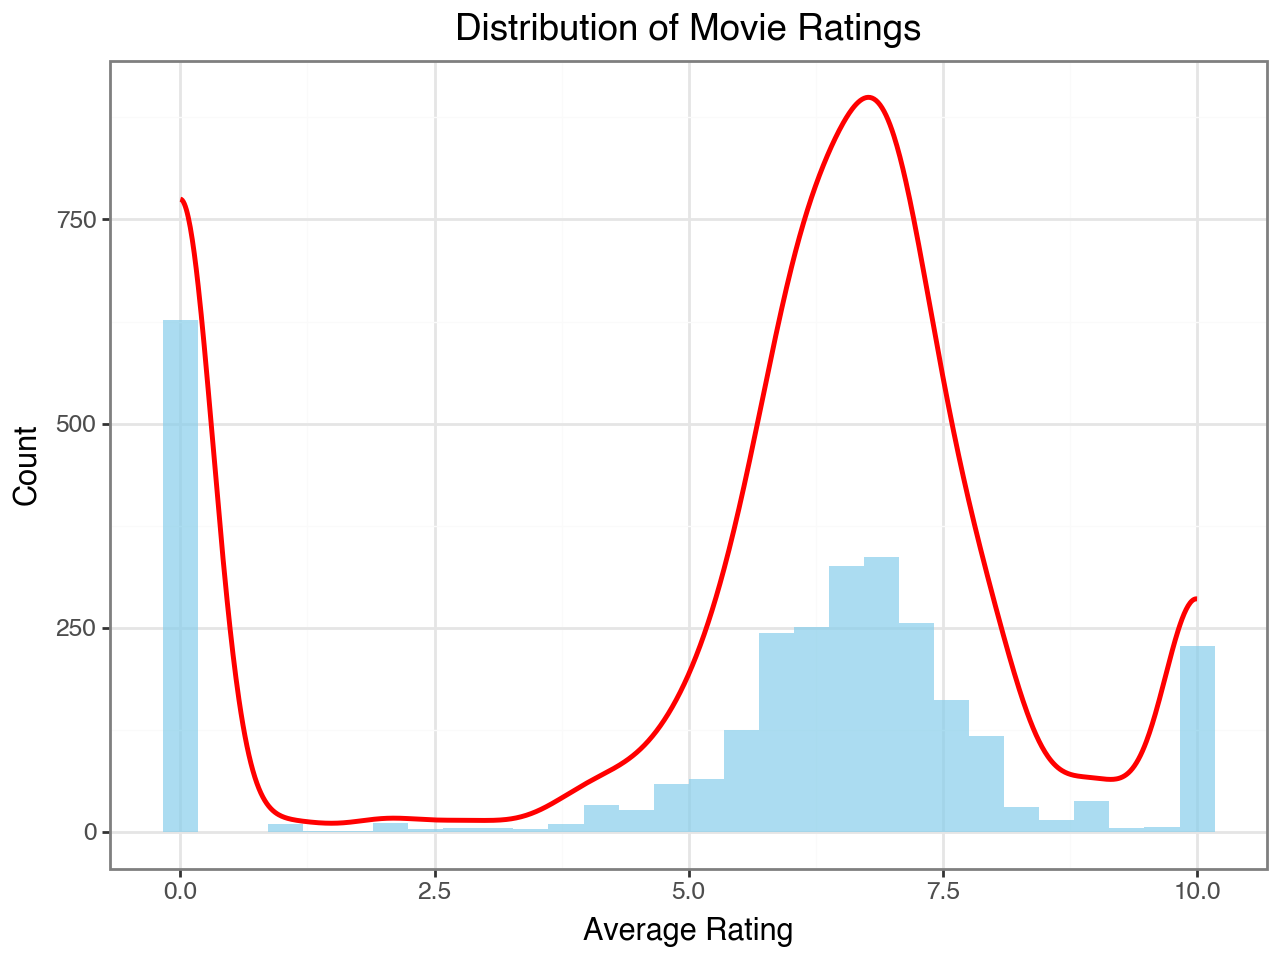

In [97]:
# Distribution of movie ratings
# Combine histogram and density curve
(ggplot(movies, aes(x='vote_average')) + 
 geom_histogram(bins=30, fill='skyblue', alpha=0.7) +  # Histogram bars
 geom_density(aes(y='stat(count)'), color='red', size=1) +  # Density overlay
 theme_bw() +  # Clean theme
 labs(title='Distribution of Movie Ratings',
      x='Average Rating',
      y='Count'))

### Faceting - Multiple Subplots

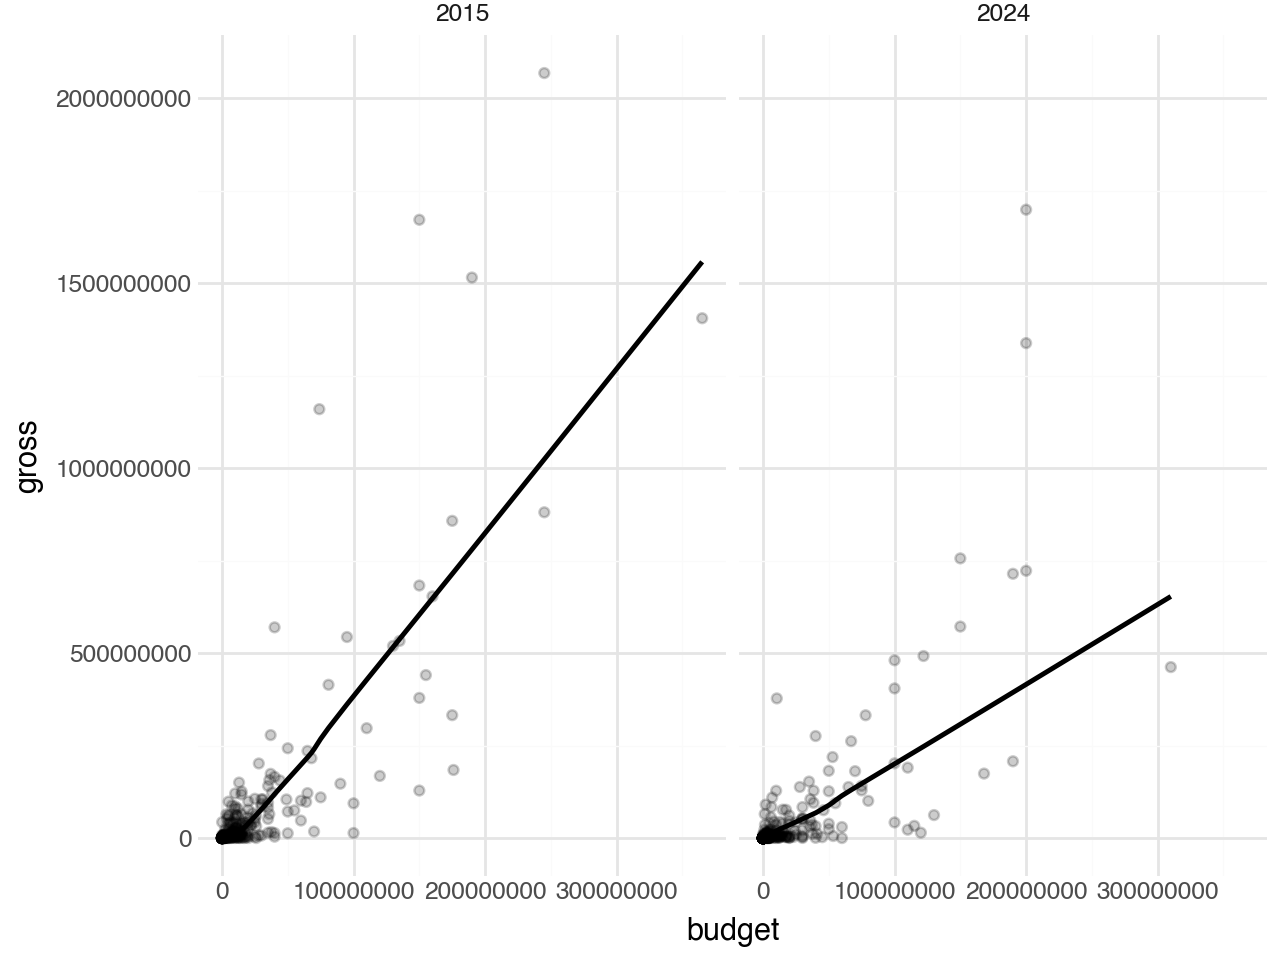

In [98]:
# Compare two years side by side
# Filter data first, then create faceted plot
(ggplot(movies[movies['title_year'].isin([2015, 2024])], 
        aes(x='budget', y='gross')) + 
 geom_point(alpha=0.2) +
 facet_wrap('~title_year') +  # Create separate panel for each year
 geom_smooth() +  # Add smoothing line to each panel
 theme_minimal())

### Different Themes

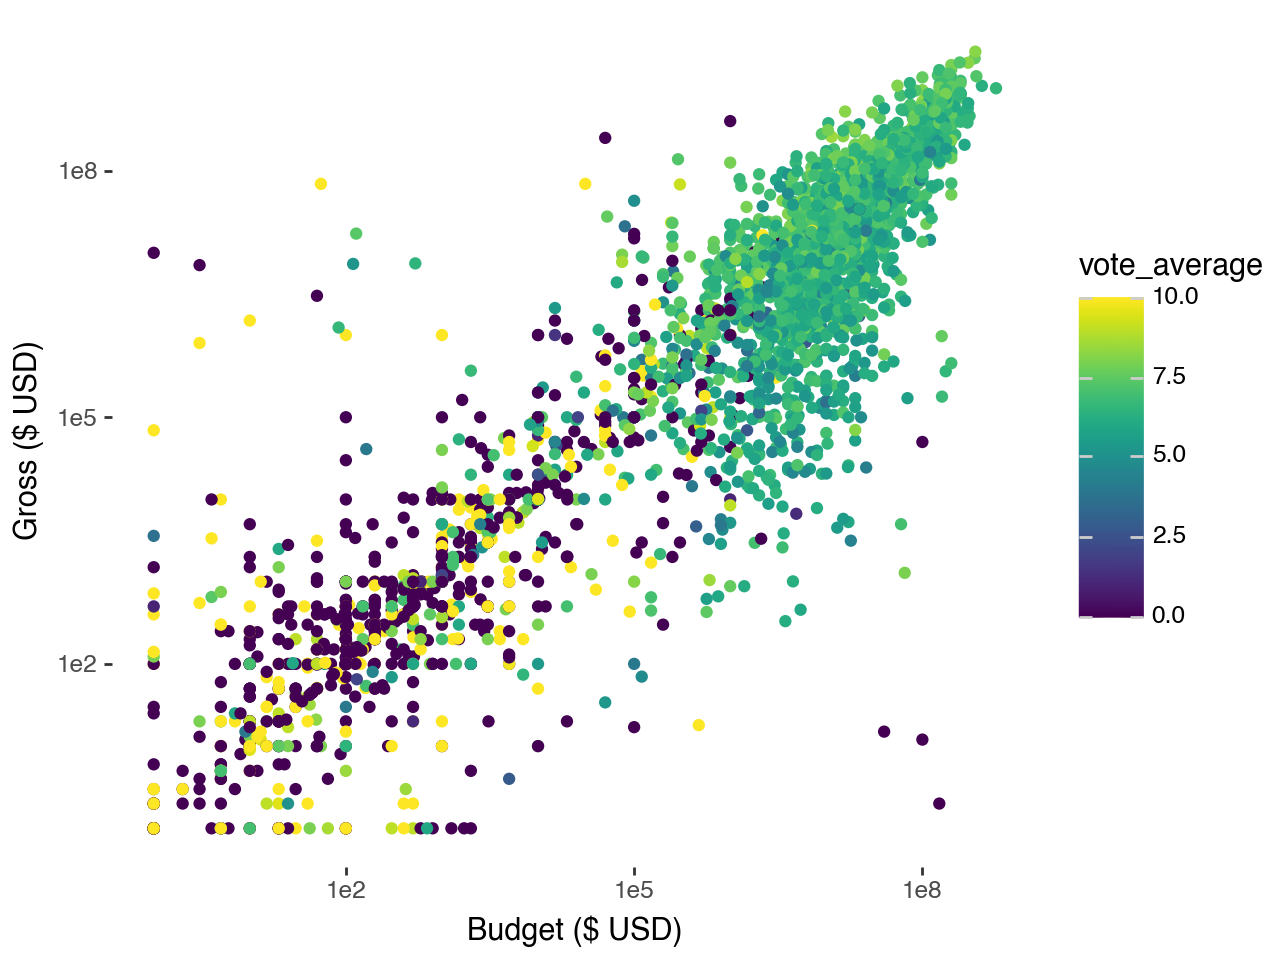

In [99]:
# Edward Tufte's minimalist theme
(ggplot(movies, aes(x='budget', y='gross', color='vote_average')) + 
 geom_point() +
 scale_x_log10() +
 scale_y_log10() +
 theme_tufte() +  # Minimalist theme
 labs(x='Budget ($ USD)',
      y='Gross ($ USD)'))

### Bar Charts

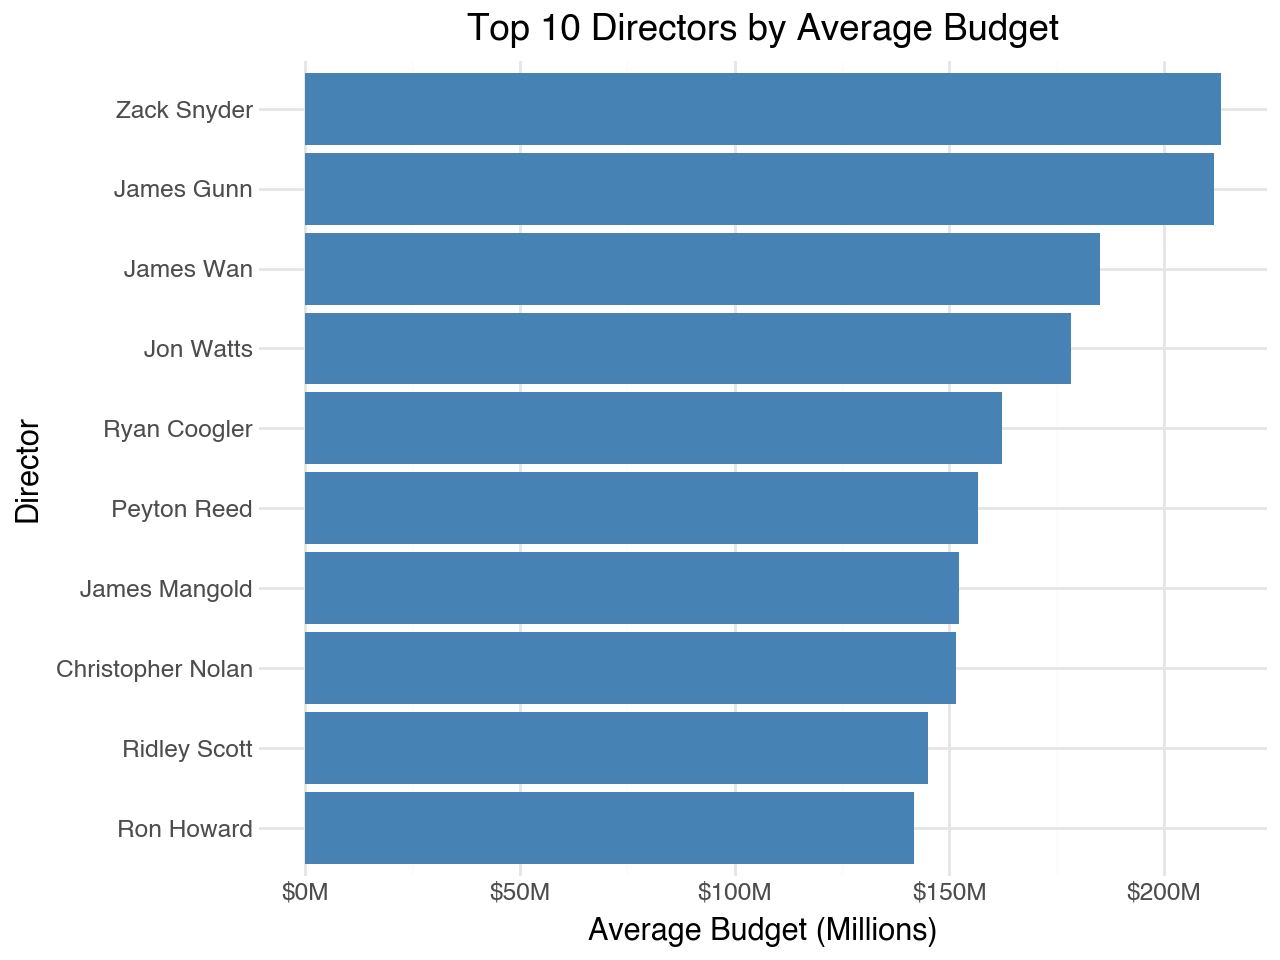

In [100]:
# Directors with highest average budgets
# First, calculate statistics
director_stats = (movies[movies['budget'] > 1000000]  # Filter micro-budgets
                  .groupby('director_name')
                  .agg({'budget': 'mean', 
                        'movie_title': 'count'})
                  .reset_index())
director_stats.columns = ['director_name', 'avg_budget', 'movie_count']

# Top 10 by average budget (min 3 films)
top_directors = (director_stats[director_stats['movie_count'] >= 3]
                 .nlargest(10, 'avg_budget'))

# Create bar chart
(ggplot(top_directors, aes(x='reorder(director_name, avg_budget)', y='avg_budget')) + 
 geom_bar(stat='identity', fill='steelblue') +
 coord_flip() +  # Horizontal bars
 theme_minimal() +
 scale_y_continuous(labels=lambda x: ['${:.0f}M'.format(v/1e6) for v in x]) +
 labs(title='Top 10 Directors by Average Budget',
      x='Director',
      y='Average Budget (Millions)'))

## 2.2 Interactive Plots with Plotly

In [101]:
# Import Plotly
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"  # For Jupyter rendering

print("Plotly loaded successfully!")

Plotly loaded successfully!


In [102]:
# Interactive scatter plot
# Hover over points to see details
fig = px.scatter(movies, 
                 x='budget', 
                 y='gross',
                 hover_data=['movie_title', 'director_name', 'title_year'],
                 color='vote_average',
                 title='Interactive Movie Budget vs Revenue')
fig.show()

In [103]:
# Animated bubble chart over time
# Filter to recent years for better performance
recent_movies = movies[movies['title_year'] >= 2010].dropna(subset=['budget', 'gross', 'vote_count'])

fig = px.scatter(recent_movies,
                 x='budget',
                 y='gross',
                 animation_frame='title_year',  # Animate by year
                 size='vote_count',  # Bubble size
                 color='vote_average',  # Color by rating
                 hover_name='movie_title',
                 log_x=True,
                 log_y=True,
                 range_x=[1e4, 5e8],
                 range_y=[1e4, 2e9],
                 title='Movie Economics Over Time (2010-2024)')
fig.show()

---
# Lab 2: Visualization Exercises

Practice creating different types of visualizations with increasing complexity.

### Exercise 1: Simple Bar Chart (Easy)
Create a bar chart showing:
- The top 5 genres by number of movies
- Use the 'genres' column
- Hint: You'll need to use value_counts() first

polars

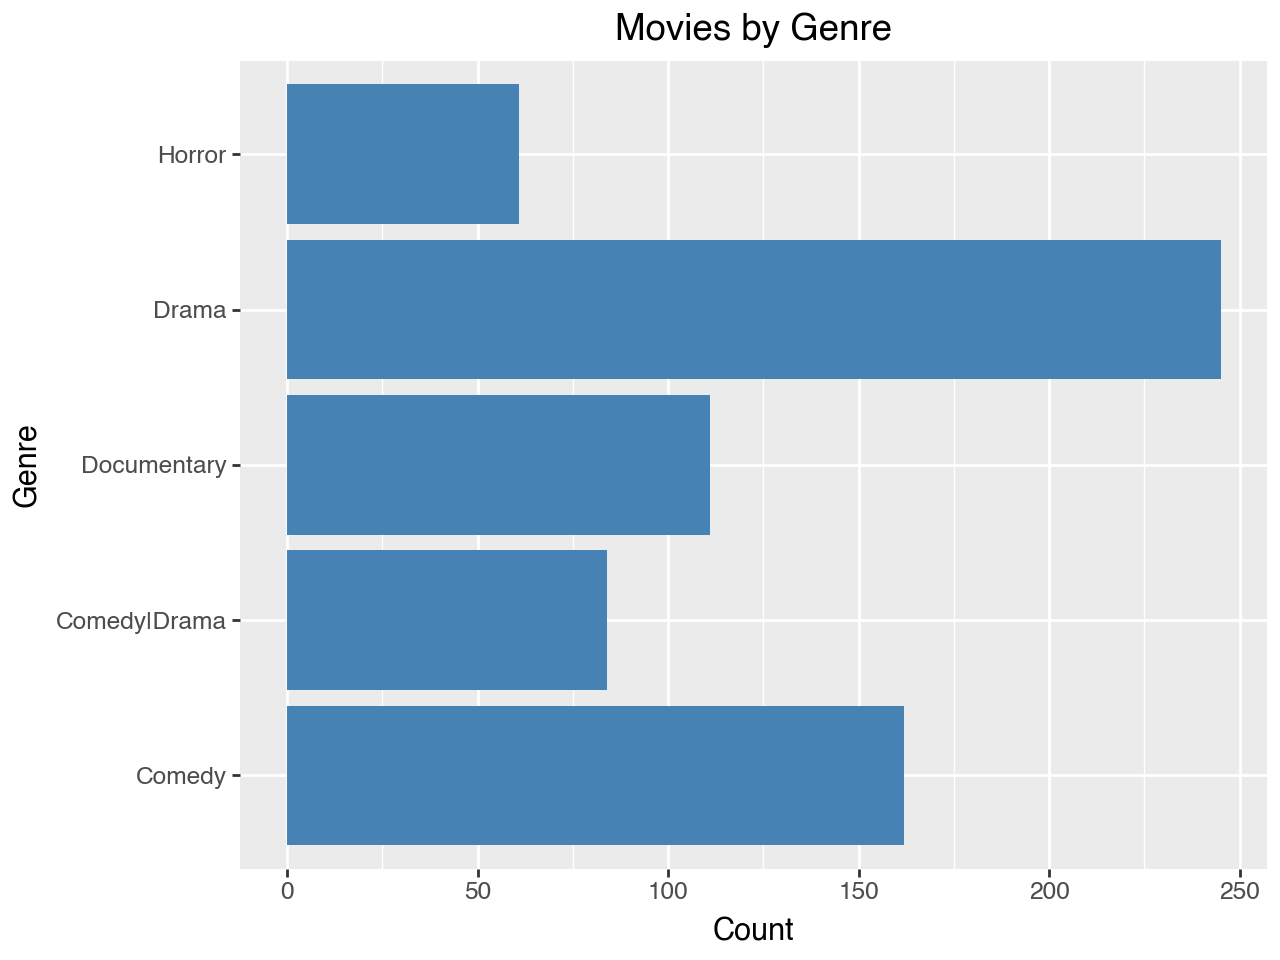

In [ ]:
# TODO: Your code here
# Hint: Start with genre_counts = movies['genres'].value_counts().head(5)
# Then create a DataFrame and use ggplot with geom_bar

genre_counts = movies['genres'].value_counts().head(5)
# # genre_counts['genres'] = str(genre_counts['genres'])
# genre_counts

# plt = (
#     ggplot(genre_counts, aes(x='genres', y='count'))
#     +  geom_bar(stat='identity', fill='steelblue') 
# )
# plt.show()

genre_counts_df = (
    genre_counts.rename_axis('genres')
                .reset_index(name='count')           
)


p = (
    ggplot(genre_counts_df, aes(x='genres', y='count'))
    + geom_col(fill='steelblue')
    + labs(x='Genre', y='Count', title='Movies by Genre')
    + coord_flip() 
)
p.show()

### Exercise 2: Histogram (Easy)
Create a histogram of movie durations:
- Use 20 bins
- Add appropriate labels
- Use a nice color

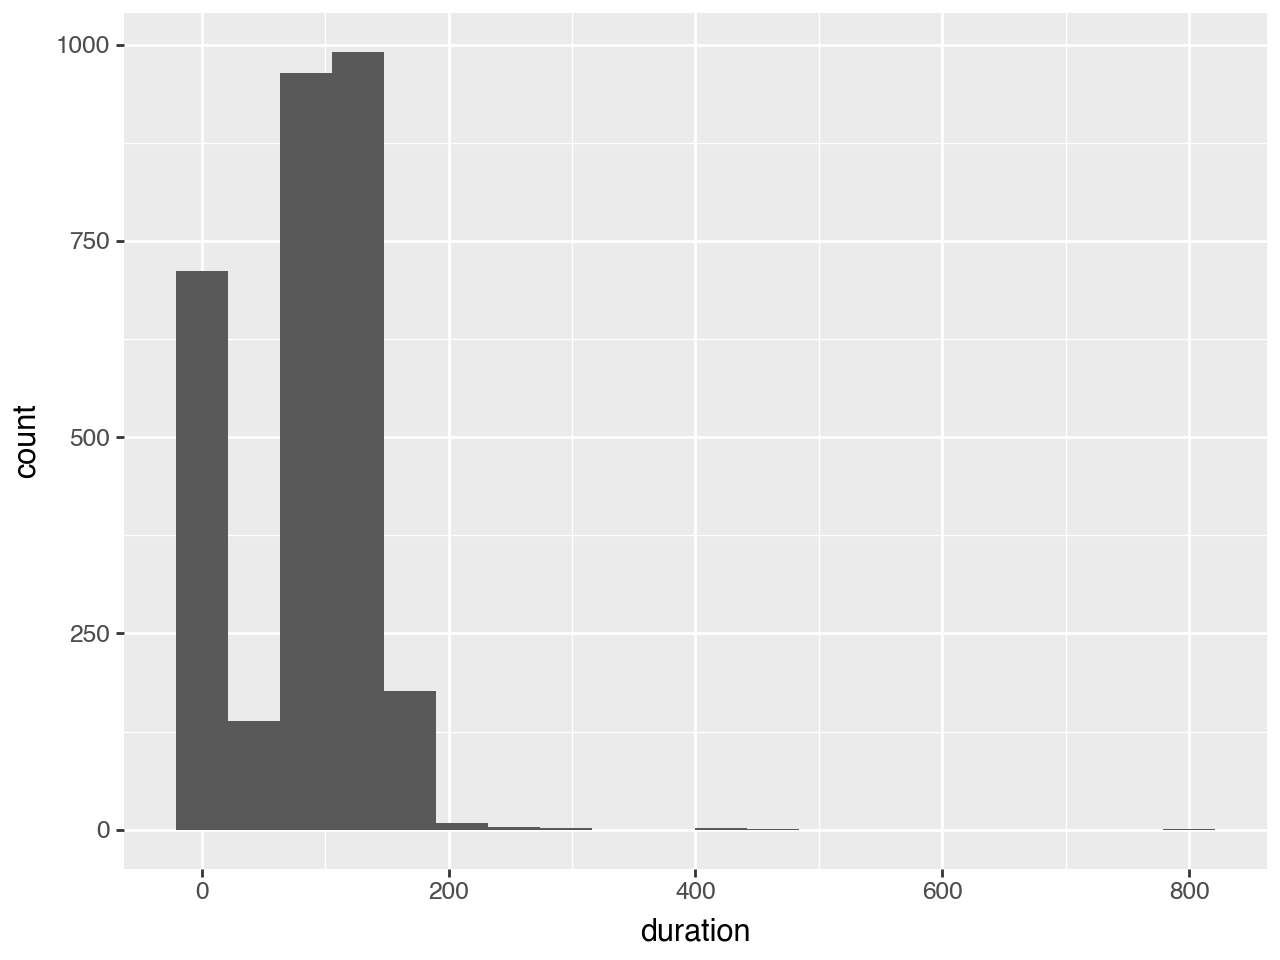

In [128]:
# TODO: Your code here


plt = ggplot(movies, aes(x='duration')) + geom_histogram(bins=20)
plt.show()

### Exercise 3: Scatter Plot with Color (Medium)
Create a scatter plot showing:
- X-axis: Number of critic reviews (num_critic_for_reviews)
- Y-axis: IMDB score (vote_average)
- Color points by budget_category (use the column we created earlier)
- Add appropriate labels

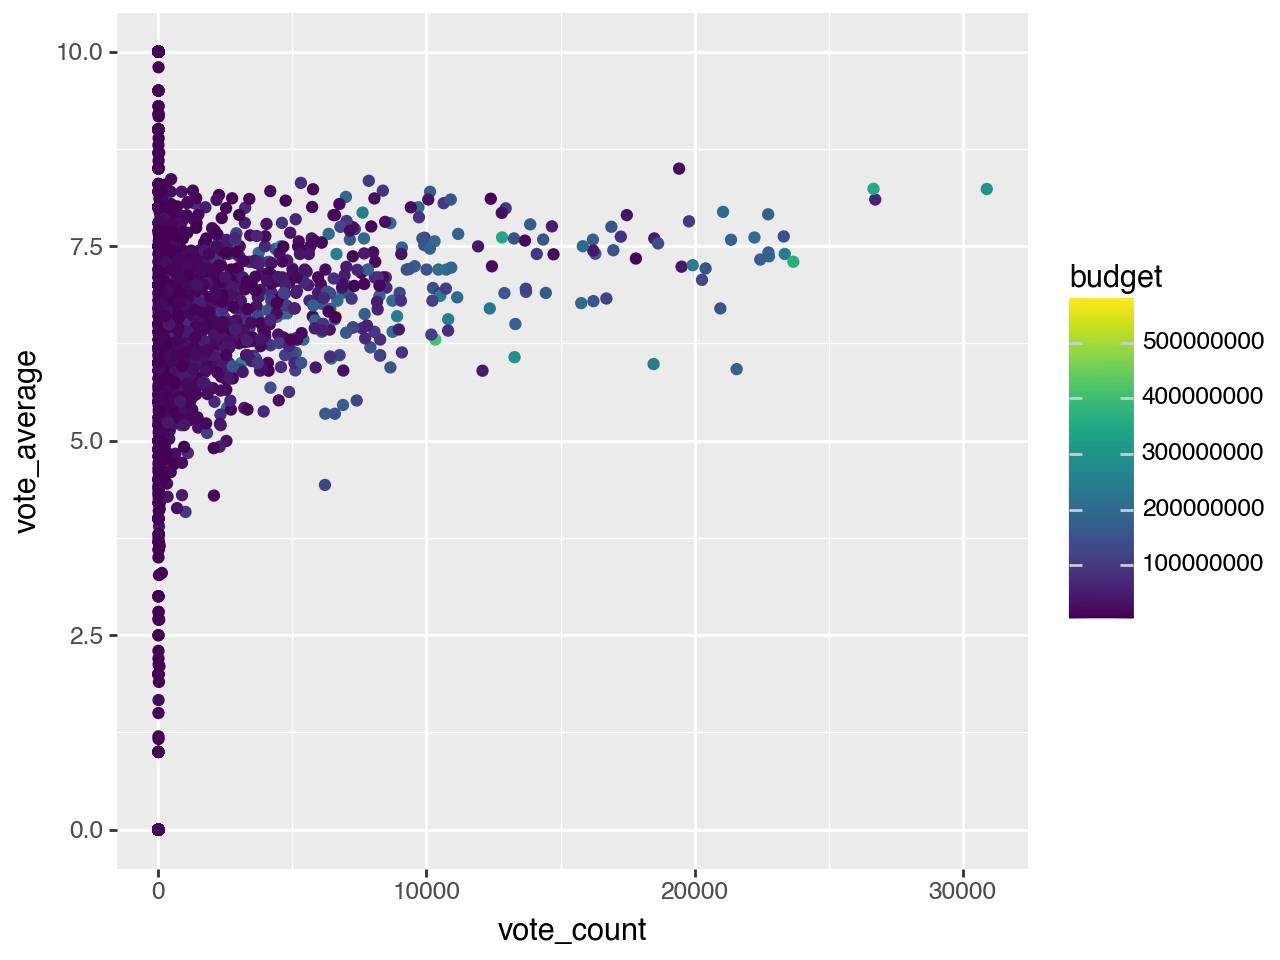

In [131]:
# TODO: Your code here
# Note: Make sure budget_category exists from Part 1

p = (
    ggplot(movies, aes(x='vote_count', y='vote_average', color='budget'))
    + geom_point()
)

# In Jupyter/Colab: just write `p`
p.show()

### Exercise 4: Box Plot (Medium)
Compare movie ratings across decades:
- Create a box plot with decade on x-axis and vote_average on y-axis
- Filter for decades 1990, 2000, 2010, 2020
- Add title and labels

In [141]:
movies['decade'].unique()


array([2020, 2010])

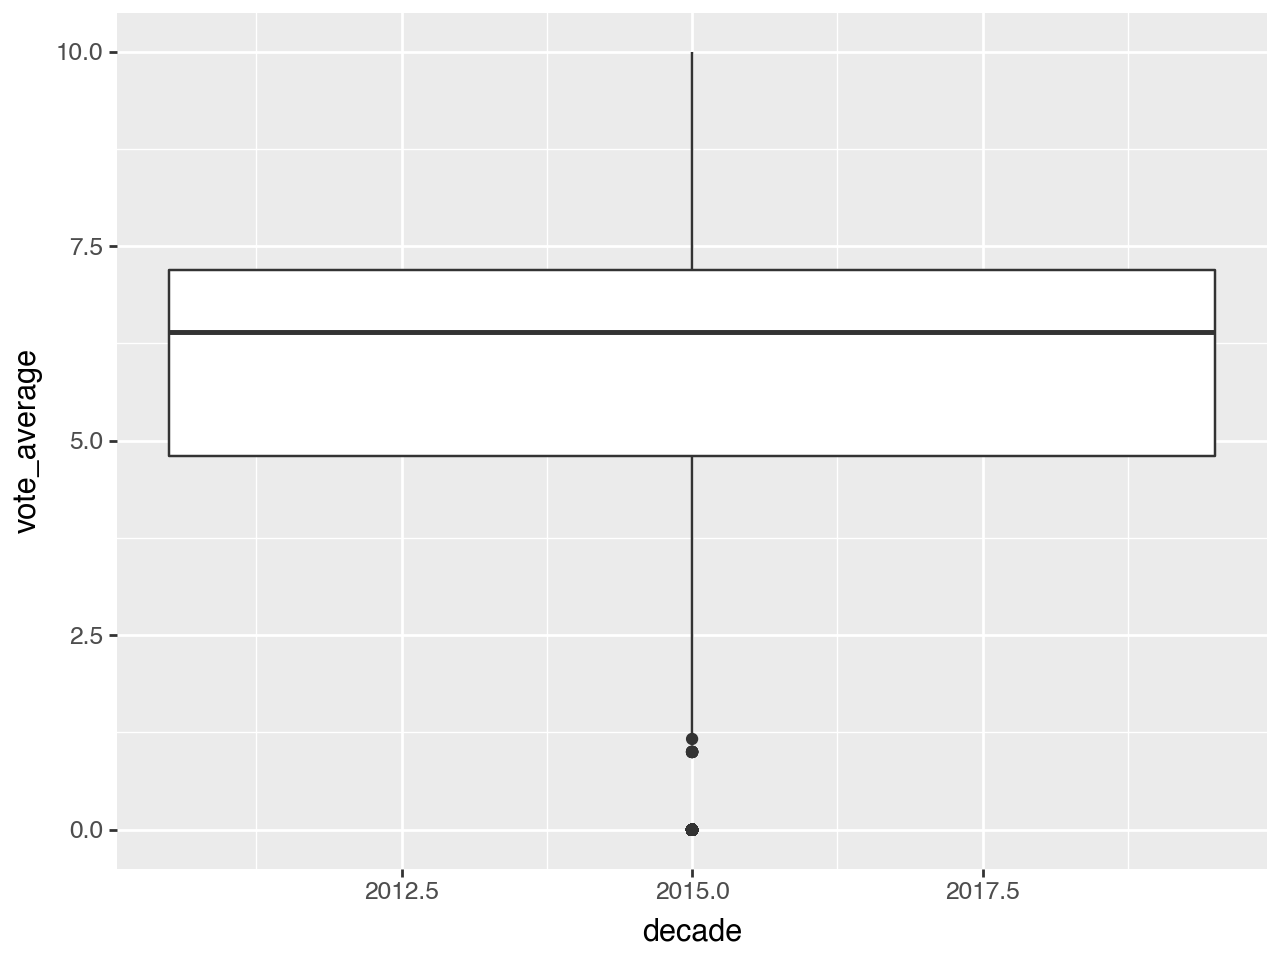

In [144]:
# TODO: Your code here
# Hint: Filter first, then use geom_boxplot()
# Make sure decade column exists from Part 1

plt = ggplot(movies[movies['decade'].isin([1990,2000,2010,2020])],aes(x='decade',y='vote_average')) + geom_boxplot()
plt


### Exercise 5: Line Plot (Medium)
Show the trend of average movie budgets over time:
- Group by year and calculate mean budget
- Create a line plot
- Add points to show individual years
- Filter for years 2000-2024

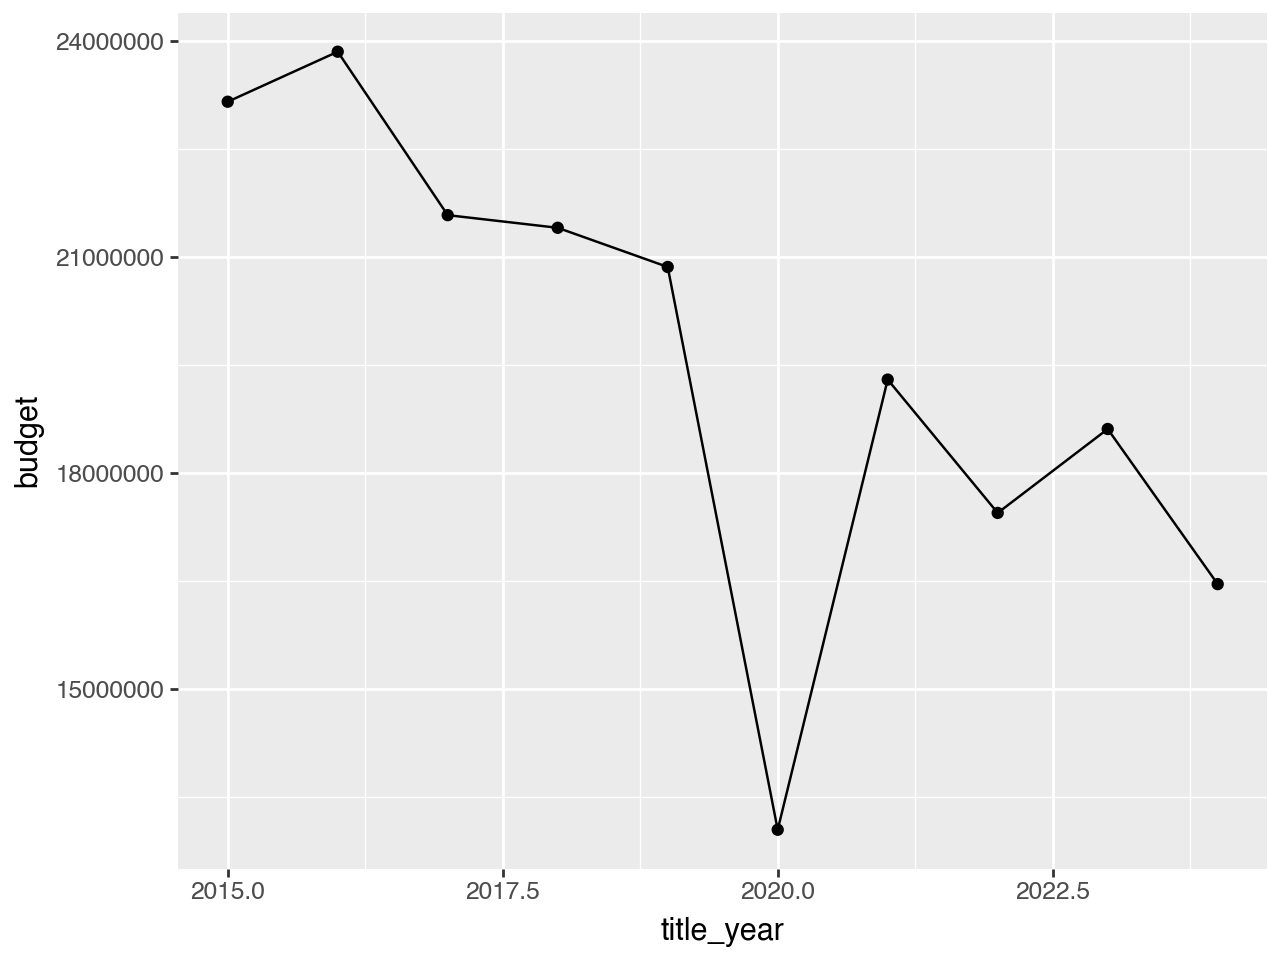

In [147]:
# TODO: Your code here
# Hint: First create yearly_budget = movies.groupby('title_year')['budget'].mean().reset_index()
# Then plot with geom_line() + geom_point()

yearly_budget = movies.groupby('title_year')['budget'].mean().reset_index()
yearly_budget
plt = ggplot(yearly_budget, aes(x='title_year',y='budget')) + geom_line() +geom_point()
plt

### Exercise 6: Faceted Plot (Medium-Hard)
Create a faceted scatter plot:
- Show budget vs gross
- Create separate panels for 'Low', 'Medium', 'High' budget categories
- Use log scales
- Add a trend line to each panel

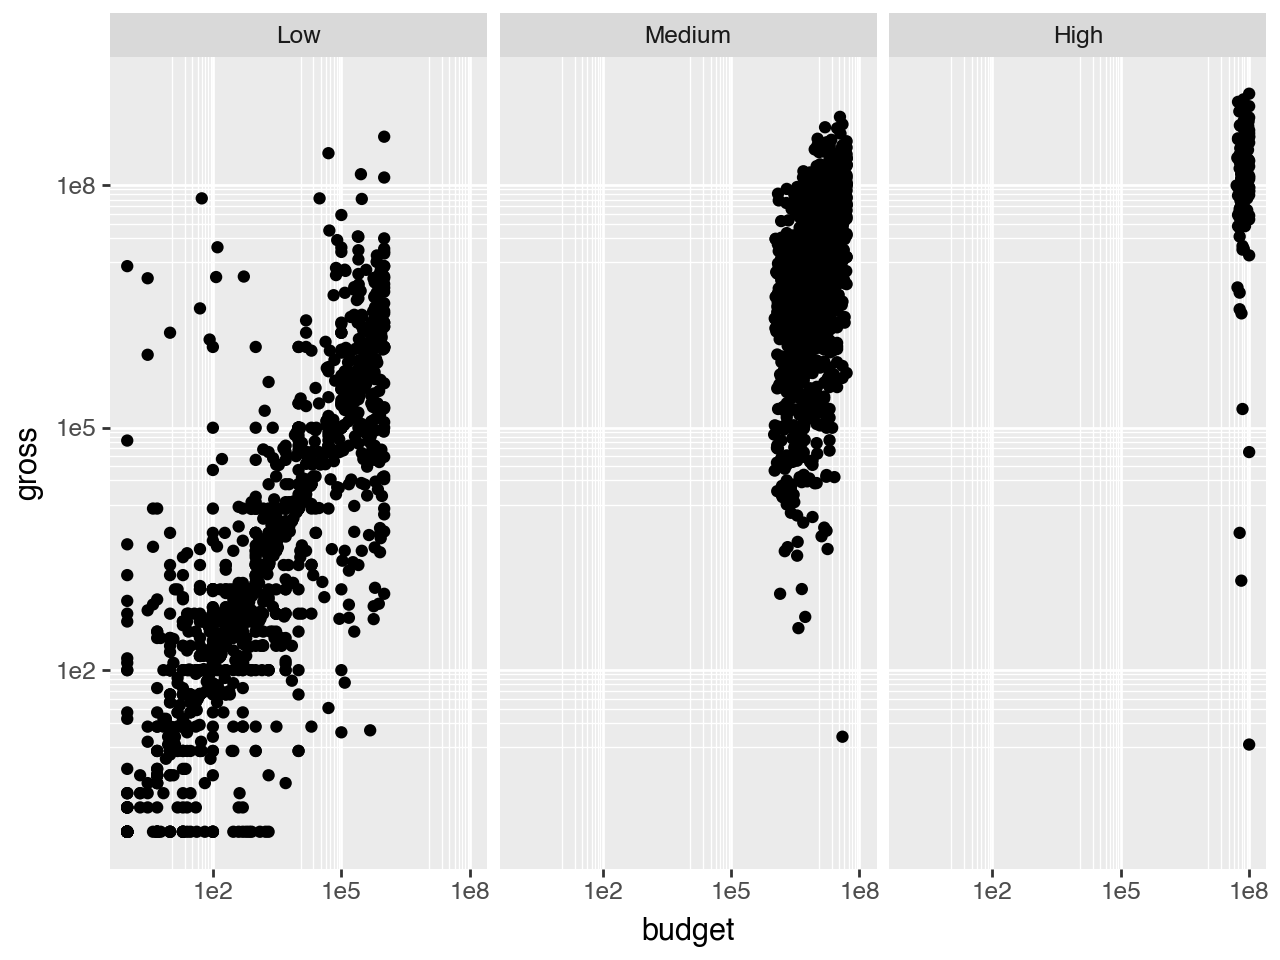

In [151]:
# TODO: Your code here
# Hint: Filter out 'Blockbuster' for cleaner display
# Use facet_wrap('~budget_category')

plt = (ggplot(movies[~movies['budget_category'].isin(['Blockbuster'])], aes(x='budget',y='gross')) 
    + geom_point() + facet_wrap('~budget_category') + 
    scale_x_log10() +
    scale_y_log10() )
plt.show()

### Exercise 7: Interactive Plot (Medium-Hard)
Create an interactive Plotly scatter plot:
- Show the relationship between duration and vote_average
- Size points by vote_count
- Color by decade
- Add hover information with movie title and director

In [152]:
# TODO: Your code here
# Hint: Use px.scatter() with size and color parameters


fig = px.scatter(movies,
                 x='duration',
                 y='vote_average',
                 size='vote_count',  # Bubble size
                 color='decade',  # Color by rating
                 hover_name='movie_title',
                 log_x=True,
                 log_y=True,
                 title='Movie Economics Over Time (2010-2024)')
fig.show()

### Exercise 8: Combined Visualization (Hard)
Create a visualization that tells a story about movie success:
- Choose your own variables and plot type
- Add at least two layers (e.g., points and a trend line)
- Use color or size aesthetics meaningfully
- Add clear title and labels
- Write a brief interpretation of what the plot shows

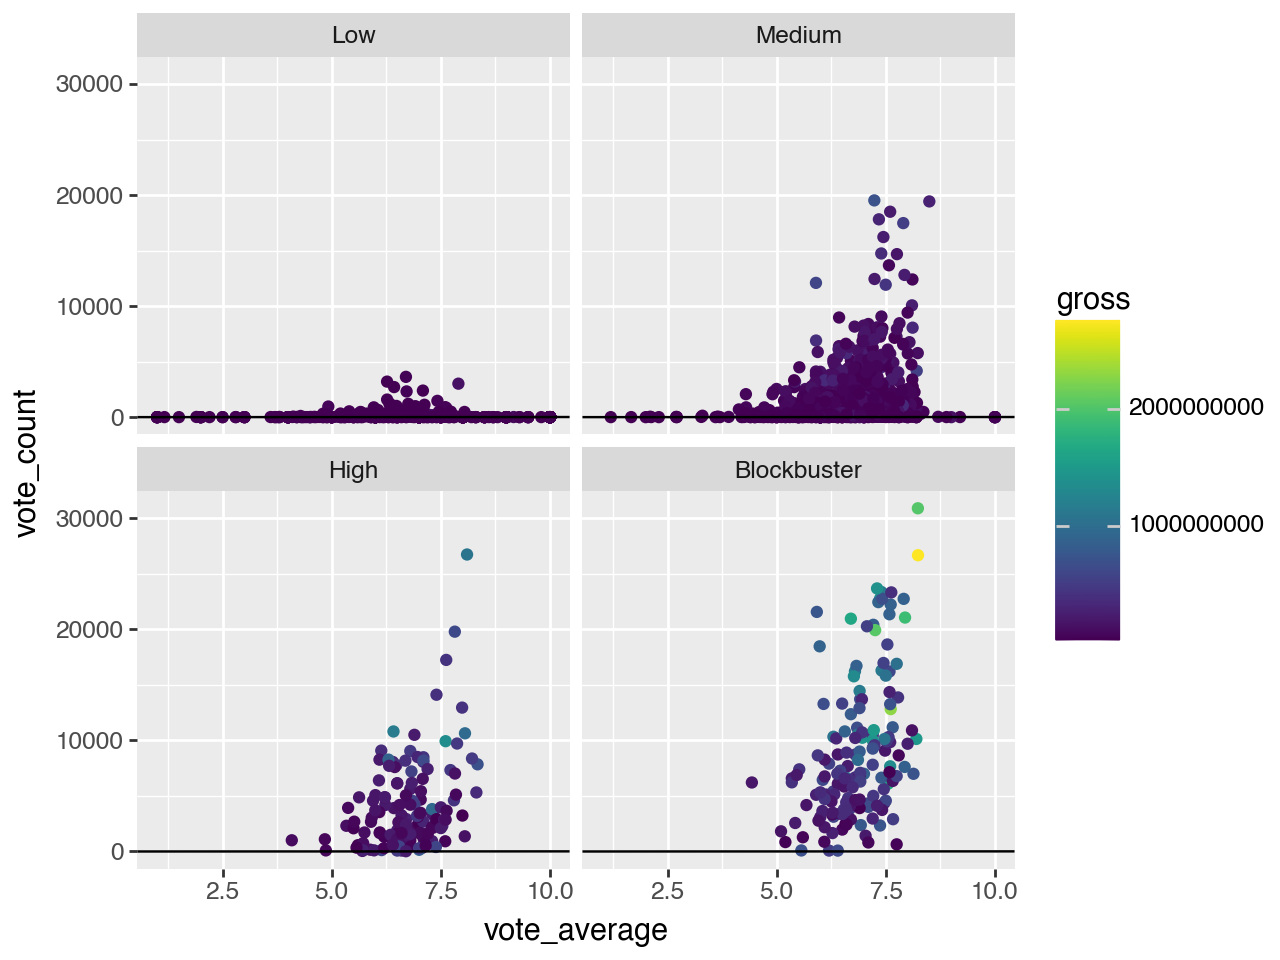

In [164]:
# TODO: Your creative visualization here

plt = ggplot(movies[(movies['vote_average']>0)&(movies['budget']> 10)], aes(x='vote_average',y='vote_count',color='gross')) + geom_point() + geom_abline() +  facet_wrap('~budget_category')
plt.show()

**Your interpretation:**
(Write 2-3 sentences about what your visualization reveals about movies)

## Notes on plot

- High budget and blockbuster movies tap out at the max vote average at around an 8

- All blockbusters and high budget films are between 5-8 range

- Medium/low budget films have scenarios for where the votes break that 8 vote average

---
## Summary

In this lab, you learned:

**Data Manipulation:**
- Loading and exploring datasets with pandas
- Selecting, filtering, and sorting data
- Creating new variables and features
- Using groupby for aggregations
- Method chaining for clean code

**Data Visualization:**
- Grammar of Graphics principles
- Creating static plots with plotnine
- Building interactive visualizations with Plotly
- Customizing plots with themes and scales

These skills form the foundation for data analysis in Python. Continue practicing with different datasets to strengthen your abilities!

---
**Next Steps:**
- Try these techniques on your own datasets
- Explore more plot types in the plotnine gallery
- Learn about more advanced pandas operations
- Practice creating interactive dashboards with Plotly